In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the CSV
df = pd.read_csv("../src/Data/raw_analyst_ratings.csv")


In [19]:
# Convert 'Date' to datetime format
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [21]:
# 1. Descriptive statistics
statistics = df.describe()

In [24]:
# 2. Analyze publication dates (Volume trends over time)
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day_of_Week'] = df['date'].dt.day_name()

In [28]:
# Grouping by Year and Month
df['Year'] = pd.to_datetime(df['date']).dt.year
df['Month'] = pd.to_datetime(df['date']).dt.month

# Group by Year and Month and count articles
article_trends = df.groupby(['Year', 'Month']).size()  # Counts the number of articles
print(article_trends)


Year    Month
2009.0  2.0          1
        4.0          3
        5.0         12
        6.0         40
        7.0         75
                 ...  
2020.0  2.0      16523
        3.0      20314
        4.0      16141
        5.0       8659
        6.0        457
Length: 136, dtype: int64


C:\Users\Administrator.MMCY\AppData\Local\Temp\ipykernel_14532\754913818.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['article_count'].resample('M').sum().plot(title='Article Count Trends Over Time')  # Monthly aggregation


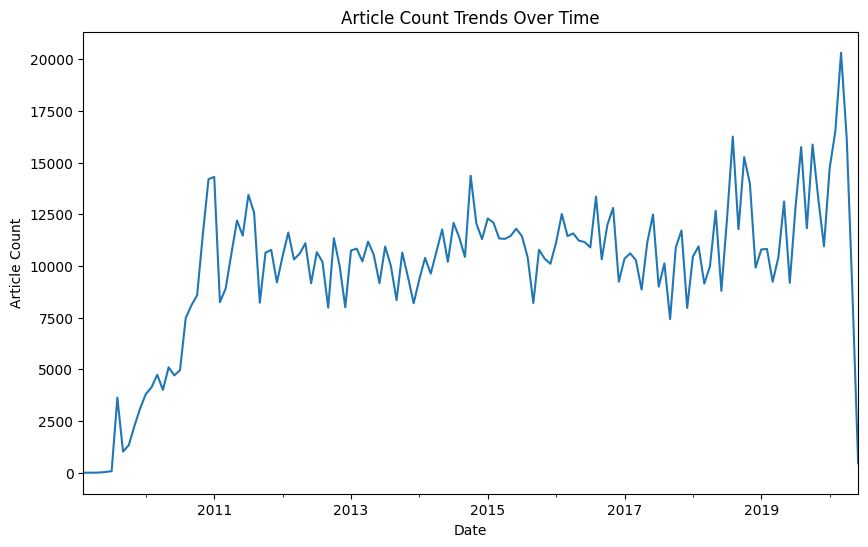

In [35]:
# Set 'date' as the index
df.set_index('date', inplace=True)

# Add an 'article_count' column to count articles
df['article_count'] = 1

# Resample by month and plot the trends
plt.figure(figsize=(10, 6))
df['article_count'].resample('M').sum().plot(title='Article Count Trends Over Time')  # Monthly aggregation
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.show()


In [39]:

print("Descriptive Statistics:")
print(statistics)


Descriptive Statistics:
         Unnamed: 0                           date
count  1.407328e+06                        1351341
mean   7.072454e+05  2015-07-06 06:39:44.879020288
min    0.000000e+00            2009-02-14 00:00:00
25%    3.538128e+05            2012-12-04 00:00:00
50%    7.072395e+05            2015-07-21 00:00:00
75%    1.060710e+06            2018-03-09 00:00:00
max    1.413848e+06            2020-06-03 00:00:00
std    4.081009e+05                            NaN


Text Analysis

In [40]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [41]:
# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [42]:

# Function to classify sentiment
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


In [43]:
# Apply sentiment analysis
df['sentiment_score'] = df['headline'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

In [44]:
# Display the results
print(df[['headline', 'sentiment_score', 'sentiment']])


                                                     headline  \
date                                                            
NaT                   Stocks That Hit 52-Week Highs On Friday   
NaT                Stocks That Hit 52-Week Highs On Wednesday   
NaT                             71 Biggest Movers From Friday   
NaT              46 Stocks Moving In Friday's Mid-Day Session   
NaT         B of A Securities Maintains Neutral on Agilent...   
...                                                       ...   
2011-08-29             Top Narrow Based Indexes For August 29   
2011-06-22  Recap: Wednesday's Top Percentage Gainers and ...   
2011-06-21  UPDATE: Oppenheimer Color on China Zenix Auto ...   
2011-06-21  Oppenheimer Initiates China Zenix At Outperfor...   
2011-05-12  China Zenix Auto International Opens For Tradi...   

            sentiment_score sentiment  
date                                   
NaT                  0.0000   Neutral  
NaT                  0.0000   Neut

In [45]:
#For Topic modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [46]:

# Preprocess the text (simple version)
vectorizer = TfidfVectorizer(stop_words='english')

In [47]:
# Convert the headlines into a TF-IDF matrix
X = vectorizer.fit_transform(df['headline'])

In [48]:
# Apply LDA for Topic Modeling (adjust n_components for more topics)
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topics, adjust as needed
lda.fit(X)

LatentDirichletAllocation(n_components=3, random_state=42)

In [49]:
# Get the words associated with each topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10


In [50]:
# Display the topics
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


Topic #1:
update shares market pt buy announces morning initiates coverage 00

Topic #2:
vs est eps reports sales price raises bank estimate q4

Topic #3:
stocks benzinga week 52 earnings session market moving scheduled biggest

